# Proyek Analisis Data: Bike Sharing
- **Nama:** Ahmad Dzulfikar Ubaidillah
- **Email:** dzulfikarubaid@gmail.com
- **ID Dicoding:** dzulfikarubaid

## Menentukan Pertanyaan Bisnis

- Apa parameter yang paling mempengaruhi jumlah penyewaan sepeda?
- Bagaimana temperatur mempengaruhi jumlah penyewaan sepeda?
- Bagaimana pola jumlah penyewaan sepeda perjam dan perharinya?

## Install dan Import Semua Packages/Library yang Digunakan

In [2]:
!pip install pandas numpy matplotlib scipy

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [106]:
df_hour = pd.read_csv("hour.csv")
df_day = pd.read_csv("day.csv")
print(df_hour.shape[0])
print(df_day.shape[0])
print(df_hour.head())
print(df_day.head())


17379
731
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  201

**Insight:**
- Dilakukan pembacaan dataset
- Diketahui variabel-variabel pada dataset
- Diketahui banyak data pada masing-masing dataset

### Assessing Data

In [107]:
print(df_hour.isna().sum())
print(df_hour.isnull().sum())


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [108]:
print(df_hour.duplicated().sum())
print(df_day.duplicated().sum())

0
0


**Insight:**
- Tidak ada nilai null pada dataset
- Tidak ada data yang duplikat
- Karena tidak ada missing value maupun duplicate value, maka tidak perlu dilakukan data cleaning

## Exploratory Data Analysis (EDA)

### Explore df_hour

In [109]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [126]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   instant      17379 non-null  int64   
 1   dteday       17379 non-null  object  
 2   season       17379 non-null  int64   
 3   yr           17379 non-null  int64   
 4   mnth         17379 non-null  int64   
 5   hr           17379 non-null  int64   
 6   holiday      17379 non-null  int64   
 7   weekday      17379 non-null  int64   
 8   workingday   17379 non-null  int64   
 9   weathersit   17379 non-null  int64   
 10  temp         17379 non-null  float64 
 11  atemp        17379 non-null  float64 
 12  hum          17379 non-null  float64 
 13  windspeed    17379 non-null  float64 
 14  casual       17379 non-null  int64   
 15  registered   17379 non-null  int64   
 16  cnt          17379 non-null  int64   
 17  actual_temp  17379 non-null  float64 
 18  temp_bin     17379 non-nul

Grouping average count per jam

In [120]:
average_cnt_per_hour =  df_hour.groupby('hr')['cnt'].mean()
average_cnt_per_hour


,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


Melakukan konversi temperature menjadi temperature aktual dan melakukan binning temperatur serta grouping average count per temperature bin

In [124]:
t_max = 39
t_min = -8
# Konversi normalized temperature (0-1) menjadi actual temperature (-8-39 Celcius)
df_hour['actual_temp'] = (df_hour['temp'] * (t_max - t_min) + t_min).round(2)
# Binning menjadi 5 kategori yaitu sangat dingin, dingin, normal, hangat, dan panas
df_hour['temp_bin'] = pd.cut(df_hour['actual_temp'], bins=5)
average_cnt_per_temp = df_hour.groupby('temp_bin')['cnt'].mean()
average_cnt_per_temp

<ipython-input-124-d281373f12bb>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_cnt_per_temp = df_hour.groupby('temp_bin')['cnt'].mean()


,cnt
temp_bin,
"(-7.106, 2.152]",65.069159
"(2.152, 11.364]",123.066828
"(11.364, 20.576]",194.671096
"(20.576, 29.788]",260.695279
"(29.788, 39.0]",326.276446


### Explore df_day

In [110]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [127]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Membuat matriks korelasi

In [111]:
df_corr = df_day.copy()
# Menghapus variabel yang kurang relevan untuk dijadikan matriks korelasi
df_corr.drop(columns=['casual', 'registered', 'instant', 'dteday', 'yr'], inplace=True)
correlation_matrix = df_corr.corr()
correlation_matrix

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.406100
mnth,0.831440,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.279977
holiday,-0.010537,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,-0.068348
weekday,-0.003080,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.067443
workingday,0.012485,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,0.061156
weathersit,0.019211,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.297391
temp,0.334315,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.342876,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.205445,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.229046,-0.207502,0.006292,0.014282,-0.018796,0.039511,-0.157944,-0.183643,-0.248489,1.000000,-0.234545


Grouping average count per day

In [119]:
df_weekday = df_day.copy()
# Menghapus data yang holiday-nya 1 atau True
df_weekday = df_weekday[df_weekday['holiday'] != 1]
print(df_weekday.shape)
average_cnt_per_day = df_weekday.groupby('weekday')['cnt'].mean()
average_cnt_per_day

(710, 16)


,cnt
weekday,
0,4228.828571
1,4398.866667
2,4544.621359
3,4520.825243
4,4720.343137
5,4718.588235
6,4550.542857


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa parameter yang paling mempengaruhi jumlah penyewaan sepeda?


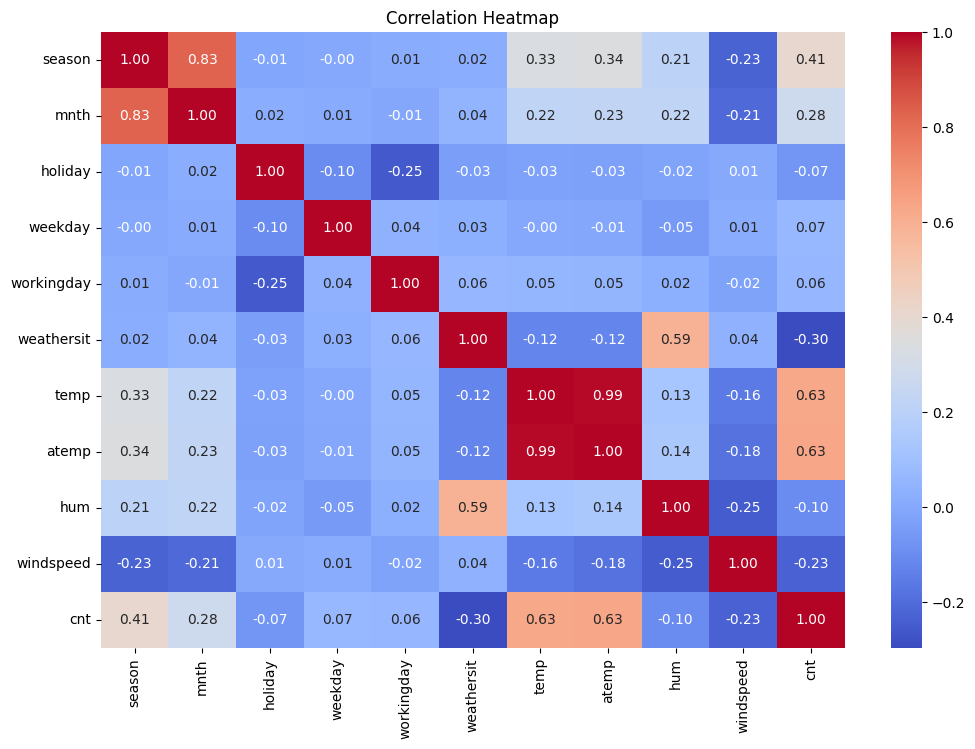

In [59]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Pertanyaan 2: Bagaimana temperatur mempengaruhi jumlah penyewaan sepeda?

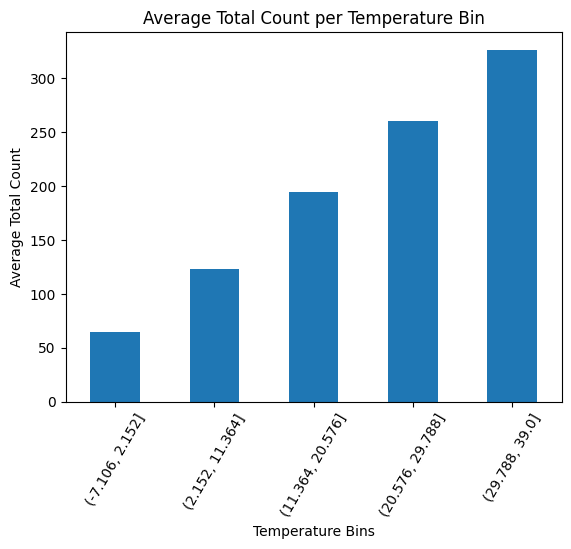

In [125]:
average_cnt_per_temp.plot(kind='bar')
plt.xlabel('Temperature Bins')
plt.ylabel('Average Total Count')
plt.title('Average Total Count per Temperature Bin')
plt.xticks(rotation=60)
plt.show()

### Pertanyaan 3: Bagaimana pola jumlah penyewaan sepeda perjam dan perharinya?

Grafik rata-rata jumlah penyewaan sepeda per hari

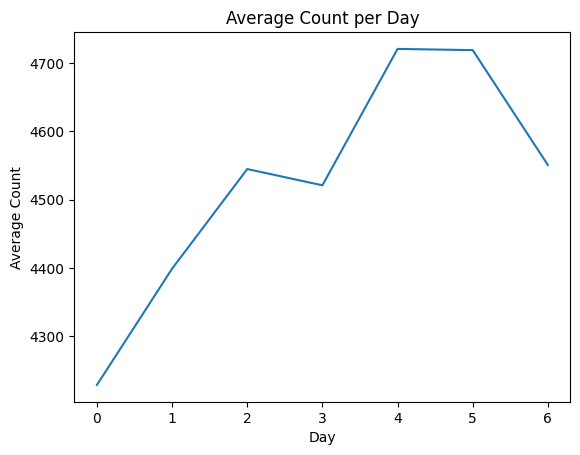

In [118]:
plt.plot(average_cnt_per_day)
plt.xlabel('Day')
plt.ylabel('Average Count')
plt.title('Average Count per Day')
plt.show()

Grafik rata-rata jumlah penyewaan sepeda per jam

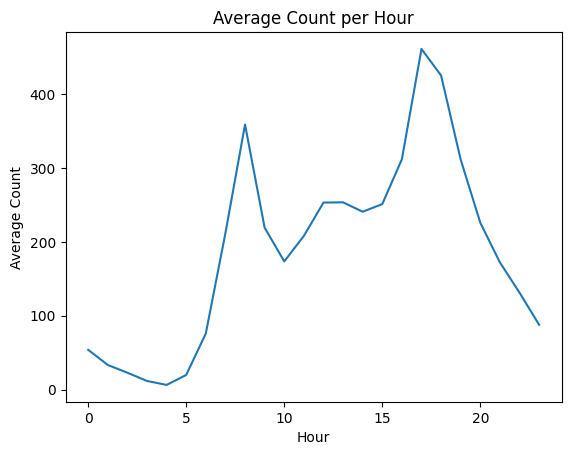

In [121]:
plt.plot(average_cnt_per_hour)
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.title('Average Count per Hour')
plt.show()

## Conclusion

### Explanatory Analysis
- Parameter yang Paling Mempengaruhi Jumlah Penyewaan Sepeda
>Dari analisis korelasi yang dilakukan, ditemukan bahwa temperature dan apparent temperature memiliki nilai korelasi sebesar 0,63 terhadap jumlah penyewaan sepeda (cnt). Ini menunjukkan hubungan positif yang kuat, artinya semakin tinggi suhu, semakin banyak orang yang menyewa sepeda. Hal ini mungkin disebabkan oleh kenyamanan yang ditawarkan ketika cuaca hangat, yang mendorong orang untuk beraktivitas di luar ruangan dan menggunakan sepeda sebagai moda transportasi.
- Pengaruh Temperatur terhadap Jumlah Penyewaan Sepeda
>Analisis grafik menunjukkan bahwa jumlah penyewaan sepeda cenderung meningkat seiring dengan meningkatnya temperatur. Ketika suhu lebih tinggi, lebih banyak orang memilih untuk menyewa sepeda. Sebaliknya, pada suhu yang lebih rendah, orang-orang cenderung lebih memilih transportasi yang lebih hangat, seperti mobil atau angkutan umum (bus atau kereta). Ini mencerminkan perilaku manusia yang beradaptasi dengan kondisi cuaca, di mana temperatur yang nyaman dapat meningkatkan minat untuk bersepeda.
-Pola Jumlah Penyewaan Sepeda per Jam dan per Hari
>Dari analisis pola penyewaan sepeda, terlihat bahwa jumlah penyewaan tertinggi terjadi pada jam 8 pagi dan jam 17-18 sore. Jam-jam ini bertepatan dengan waktu orang pergi dan pulang kerja, menunjukkan bahwa sepeda menjadi pilihan transportasi yang populer selama jam sibuk.
Selain itu, analisis juga menunjukkan bahwa jumlah penyewaan sepeda tertinggi terjadi pada hari Kamis dan Jumat, sementara terjadi penurunan yang signifikan pada hari Minggu. Hal ini mungkin terkait dengan aktivitas manusia, di mana banyak orang menggunakan sepeda untuk keperluan sehari-hari di awal dan akhir minggu kerja, sedangkan pada hari Minggu, aktivitas masyarakat bisa lebih beragam dan mungkin tidak sepadat hari kerja.

### Kesimpulan
Dari analisis di atas, dapat disimpulkan bahwa:
- Temperature dan apparent temperature adalah faktor utama yang mempengaruhi jumlah penyewaan sepeda, dengan nilai korelasi yang signifikan.
- Jumlah penyewaan sepeda meningkat dengan meningkatnya temperatur, yang menunjukkan preferensi pengguna terhadap cuaca hangat untuk bersepeda.
- Pola penyewaan sepeda menunjukkan puncaknya pada jam-jam sibuk (pagi dan sore) dan di hari kerja, dengan penurunan pada hari Minggu.